In [246]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from scipy.optimize import curve_fit
from scipy import stats

In [138]:
sim_semi_df = pd.read_csv("dS32p0_summary.csv", delimiter=",")
sim_mix_df = pd.read_csv("dS32p0mix_summary.csv", delimiter=",")
sim_mix_38_df = pd.read_csv("dS38p0_mixed_summary.csv", delimiter=",")
sim_mix_26_df = pd.read_csv("dS26p0_mixed_summary.csv", delimiter=",")
sim_semi_38_df = pd.read_csv("dS38p0_semi_summary.csv", delimiter=",")
sim_semi_26_df = pd.read_csv("dS26p0_semi_summary.csv", delimiter=",")

In [139]:
sim_mix_56_df = pd.read_csv("dS56p0_mixed_summary_.csv", delimiter=",")
sim_mix_90_new_df = pd.read_csv("dS90p0_mixed_summary_.csv", delimiter=",")

In [140]:
sim_mix_38_df = pd.read_csv("dS38p0_mixed_summary.csv", delimiter=",")

In [141]:
perc_homo_data = pd.read_csv("percentage_homo_cells_df_from_curve_max100.csv", delimiter=",")
perc_homo_data

,time,perc_homoplasmic_cells
0,0.0,13.796744
1,1.5,13.811090
2,3.0,13.974290
3,4.5,15.750380
4,6.0,28.698290
5,7.5,49.250570


In [142]:
sim_mix_90_new_heatmap = sim_mix_90_new_df.pivot(index="ndau", columns="nspl", values="dist")
sim_mix_56_heatmap = sim_mix_56_df.pivot(index="ndau", columns="nspl", values="dist")

In [143]:
sim_mix_90_df = pd.read_csv("dS90p0_mixed_summary.csv", delimiter=",")
sim_sorted_26_df = pd.read_csv("hhsorted_26_summary.csv", delimiter=",")
sim_sorted_32_df = pd.read_csv("hhsorted_summary.csv", delimiter=",")
sim_sorted_38_df = pd.read_csv("hhsorted_38_summary.csv", delimiter=",")

In [144]:
sim_sorted_38_heatmap = sim_sorted_38_df.pivot(index="ndau", columns="nspl", values="dist")
sim_sorted_26_heatmap = sim_sorted_26_df.pivot(index="ndau", columns="nspl", values="dist")
sim_sorted_32_heatmap = sim_sorted_32_df.pivot(index="ndau", columns="nspl", values="dist") 
sim_mix_90_heatmap = sim_mix_90_df.pivot(index="ndau", columns="nspl", values="dist")

In [145]:
sim_mix_heatmap = sim_mix_df.pivot(index="ndau", columns="nspl", values="dist")
sim_semi_heatmap = sim_semi_df.pivot(index="ndau", columns="nspl", values="dist")
sim_mix_38_heatmap = sim_mix_38_df.pivot(index="ndau", columns="nspl", values="dist")
sim_mix_26_heatmap = sim_mix_26_df.pivot(index="ndau", columns="nspl", values="dist")
sim_semi_38_heatmap = sim_semi_38_df.pivot(index="ndau", columns="nspl", values="dist") 
sim_semi_26_heatmap = sim_semi_26_df.pivot(index="ndau", columns="nspl", values="dist")

In [149]:
sim_mix_t75_heatmap = sim_mix_df.pivot(index="ndau", columns="nspl", values="fbt75")

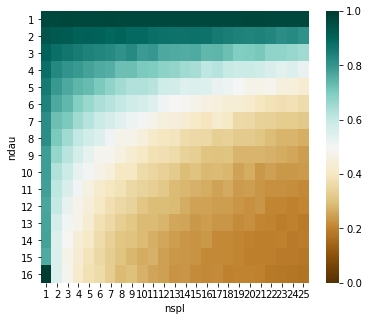

In [150]:
fig, ax = plt.subplots(figsize=(6, 5))
heatmap = sns.heatmap(sim_mix_t75_heatmap, vmax=1, vmin=0, cmap='BrBG')

ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)

plt.rcParams['svg.fonttype'] = 'none'
#plt.savefig('sim_hits_mix_t75_50perchomo_heatmap.svg', transparent= True)

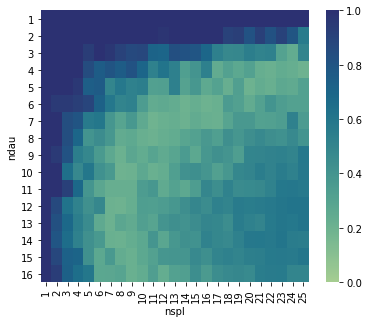

In [11]:
fig, ax = plt.subplots(figsize=(6, 5))
heatmap = sns.heatmap(sim_sorted_26_heatmap, vmax=1, vmin=0, cmap='crest')
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('sim_hits_sorted_26_heatmap.svg', transparent= True)

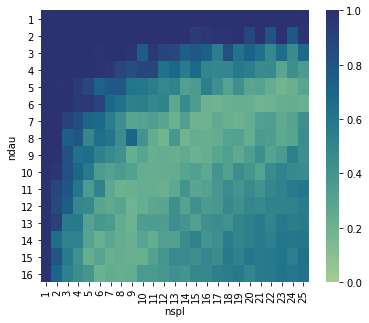

In [12]:
fig, ax = plt.subplots(figsize=(6, 5))
heatmap = sns.heatmap(sim_sorted_38_heatmap, vmax=1, vmin=0, cmap='crest')
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('sim_hits_sorted_38_heatmap.svg', transparent= True)

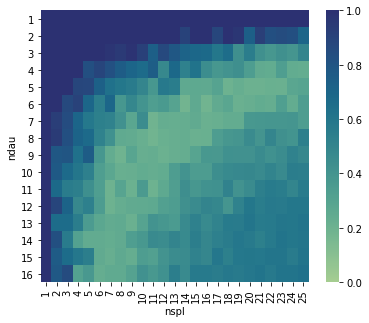

In [13]:
fig, ax = plt.subplots(figsize=(6, 5))
heatmap = sns.heatmap(sim_sorted_32_heatmap, vmax=1, vmin=0, cmap='crest')
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('sim_hits_sorted_32_heatmap.svg', transparent= True)

In [151]:
def create_result_df(sim_df, ndau, nspl):
    # Filter DataFrame based on ndau and nspl
    filtered_df = sim_df[(sim_df['ndau'] == ndau) & (sim_df['nspl'] == nspl)]

    # Reshape the DataFrame
    melted_df = filtered_df.melt(id_vars=['Unnamed: 0', 'nspl', 'ndau', 'dist'], 
                                  value_vars=['fbt0', 'fbt15', 'fbt3', 'fbt45', 'fbt6', 'fbt75'],
                                  var_name='time', value_name='perc_homo')

    # Assign specific values to the 'time' column
    melted_df['time'] = [0.0, 1.5, 3.0, 4.5, 6.0, 7.5]

    # Create the resulting DataFrame
    result_df = melted_df[['time', 'perc_homo']]

    return result_df


In [152]:
def create_result_dfs(sim_df, combinations):
    result_dfs = []

    for ndau, nspl in combinations:
        # Filter DataFrame based on ndau and nspl
        filtered_df = sim_df[(sim_df['ndau'] == ndau) & (sim_df['nspl'] == nspl)]

        # Reshape the DataFrame
        melted_df = filtered_df.melt(id_vars=['Unnamed: 0', 'nspl', 'ndau', 'dist'], 
                                      value_vars=['fbt0', 'fbt15', 'fbt3', 'fbt45', 'fbt6', 'fbt75'],
                                      var_name='time', value_name='perc_homo')

        # Assign specific values to the 'time' column
        melted_df['time'] = [0.0, 1.5, 3.0, 4.5, 6.0, 7.5]

        # Create the resulting DataFrame
        result_df = melted_df[['time', 'perc_homo']]

        # Multiply 'perc_homo' column by 100
        result_df['perc_homo'] = result_df['perc_homo'] * 100

        result_dfs.append(result_df)

    return result_dfs

In [153]:
def plot_result_dfs(result_dfs, labels, actual_data=None):
    plt.figure(figsize=(10, 5))

    # Generate a colormap with as many colors as there are combinations
    colors = cm.YlGnBu_r([i / len(result_dfs) for i in range(len(result_dfs))])

    # Define a list of markers to use
    markers = [ '^' ,'s', 'v','x', '<', '>', 'D', 'P', '*', '+']

    for i, df in enumerate(result_dfs):
        # Use a different marker for each 'i'
        marker_index = i % len(markers)
        plt.plot(df['time'], df['perc_homo'], marker=markers[marker_index], linestyle='-', label=labels[i], color=colors[i])

    if actual_data is not None:
        plt.plot(actual_data['time'], actual_data['perc_homoplasmic_cells'], marker= 'o', linewidth=3, linestyle='-', label='Actual Data', color='black')

    plt.xlabel('Time (in hours)')
    plt.ylabel('Percentage of Homoplasmic Cells')
    plt.ylim(0, 100)
    plt.legend()
    
    return plt

<ipython-input-152-76a232726e35>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result_df['perc_homo'] = result_df['perc_homo'] * 100
<ipython-input-152-76a232726e35>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result_df['perc_homo'] = result_df['perc_homo'] * 100
<ipython-input-152-76a232726e35>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas

ValueError: Multi-dimensional indexing (e.g. `obj[:, None]`) is no longer supported. Convert to a numpy array before indexing instead.

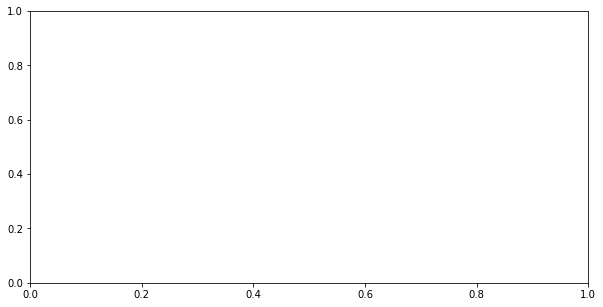

In [154]:
#combinations = [(3, 4), (6, 10), (10, 5), (11, 5),(12, 9), (14, 13), (15, 20), (16, 3),  (7, 2)]
combinations = [(3, 4), (3, 23), (10, 6), (14, 4), (7, 25), (16, 20), ]
result_dfs = create_result_dfs(sim_mix_df, combinations)

labels = [f'ndau{ndau}_nspl{nspl}' for ndau, nspl in combinations]

sigmoid_curves_mix = plot_result_dfs(result_dfs, labels, actual_data=perc_homo_data)   
sigmoid_curves_mix.savefig('sigmoid_curves_sim_mix.svg', transparent=True)
#sigmoid_curves_mix.show()

In [156]:
ndau11_nspl5_df = create_result_df(sim_mix_df, ndau=11, nspl=5)
ndau11_nspl5_df['perc_homo'] = ndau11_nspl5_df['perc_homo'] * 100
print(ndau11_nspl5_df)

   time  perc_homo
0   0.0  11.764706
1   1.5  14.411765
2   3.0  17.941176
3   4.5  25.441176
4   6.0  35.404412
5   7.5  45.955882


In [157]:
sim_mix_38_df.nsmallest(10, 'dist')

,Unnamed: 0,nspl,ndau,fbt0,fbt15,fbt3,fbt45,fbt6,fbt75,dist
59,60,4,15,0.117647,0.144118,0.170588,0.235294,0.338235,0.458824,0.105892
74,75,5,15,0.117647,0.147059,0.172059,0.222059,0.302941,0.408456,0.114121
72,73,5,13,0.117647,0.144118,0.166176,0.239706,0.348529,0.455882,0.114167
73,74,5,14,0.117647,0.147059,0.169118,0.241912,0.340074,0.446324,0.115896
87,88,6,13,0.117647,0.147059,0.175000,0.234559,0.320588,0.423162,0.116668
88,89,6,14,0.117647,0.141176,0.167647,0.222794,0.306250,0.396691,0.122538
44,45,3,15,0.117647,0.144118,0.172059,0.245588,0.363603,0.497978,0.123097
89,90,6,15,0.117647,0.144118,0.170588,0.225735,0.299632,0.388787,0.130283
102,103,7,13,0.117647,0.144118,0.175000,0.240441,0.314338,0.401103,0.132942
116,117,8,12,0.117647,0.147059,0.175000,0.229412,0.303309,0.387316,0.135049


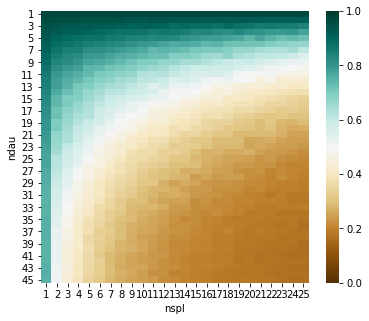

In [158]:
sim_mix_90_new_heatmap = sim_mix_90_new_df.pivot(index="ndau", columns="nspl", values="fbt75")

fig, ax = plt.subplots(figsize=(6, 5))
heatmap = sns.heatmap(sim_mix_90_new_heatmap, vmax=1, vmin=0, cmap='BrBG')

ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
plt.rcParams['svg.fonttype'] = 'none'
#plt.savefig('sim_hits_mix_90_t75_50perchomo_heatmap.svg', transparent= True)

[Text(0, 0.5, '1'),
 Text(0, 2.5, '3'),
 Text(0, 4.5, '5'),
 Text(0, 6.5, '7'),
 Text(0, 8.5, '9'),
 Text(0, 10.5, '11'),
 Text(0, 12.5, '13'),
 Text(0, 14.5, '15'),
 Text(0, 16.5, '17'),
 Text(0, 18.5, '19'),
 Text(0, 20.5, '21'),
 Text(0, 22.5, '23'),
 Text(0, 24.5, '25'),
 Text(0, 26.5, '27')]

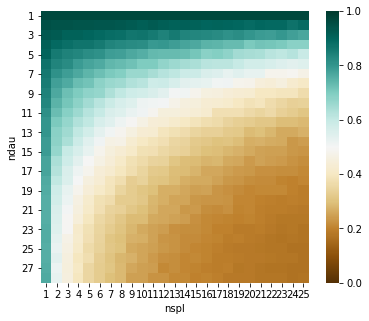

In [159]:
sim_mix_56_heatmap = sim_mix_56_df.pivot(index="ndau", columns="nspl", values="fbt75")

fig, ax = plt.subplots(figsize=(6, 5))
heatmap = sns.heatmap(sim_mix_56_heatmap, vmax=1, vmin=0, cmap='BrBG')

ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
#plt.savefig('sim_hits_mix_56_t75_50perchomo_heatmap.svg', transparent= True)

In [251]:
ndau25_nspl4_56df = create_result_df(sim_mix_56_df, ndau=25, nspl=4)
ndau25_nspl4_56df['perc_homo'] = ndau25_nspl4_56df['perc_homo'] * 100
ndau25_nspl4_56df.set_index('time', inplace=True)

ndau14_nspl4_56df = create_result_df(sim_mix_56_df, ndau=14, nspl=4)
ndau14_nspl4_56df['perc_homo'] = ndau14_nspl4_56df['perc_homo'] * 100
ndau14_nspl4_56df.set_index('time', inplace=True)

ndau25_nspl7_56df = create_result_df(sim_mix_56_df, ndau=25, nspl=7)
ndau25_nspl7_56df['perc_homo'] = ndau25_nspl7_56df['perc_homo'] * 100
ndau25_nspl7_56df.set_index('time', inplace=True)

In [252]:
ndau39_nspl4_90df = create_result_df(sim_mix_90_new_df, ndau=39, nspl=4)
ndau39_nspl4_90df['perc_homo'] = ndau39_nspl4_90df['perc_homo'] * 100
ndau39_nspl4_90df.set_index('time', inplace=True)

ndau14_nspl4_90df = create_result_df(sim_mix_90_new_df, ndau=14, nspl=4)
ndau14_nspl4_90df['perc_homo'] = ndau14_nspl4_90df['perc_homo'] * 100
ndau14_nspl4_90df.set_index('time', inplace=True)

ndau39_nspl12_90df = create_result_df(sim_mix_90_new_df, ndau=39, nspl=12)
ndau39_nspl12_90df['perc_homo'] = ndau39_nspl12_90df['perc_homo'] * 100
ndau39_nspl12_90df.set_index('time', inplace=True)

In [237]:
ndau14_nspl4_df = create_result_df(sim_mix_df, ndau=14, nspl=4)
ndau14_nspl4_df['perc_homo'] = ndau14_nspl4_df['perc_homo'] * 100
ndau14_nspl4_df.set_index('time', inplace=True)

print(ndau14_nspl4_df)

      perc_homo
time           
0.0   11.764706
1.5   14.705882
3.0   16.764706
4.5   21.029412
6.0   31.875000
7.5   43.897059


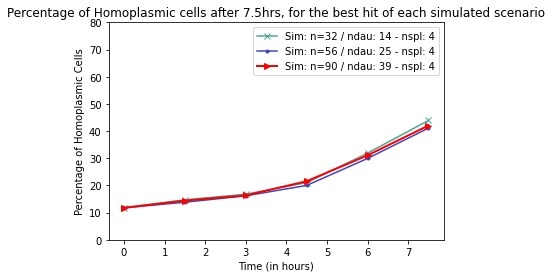

In [245]:
plt.figure(figsize=(6, 4))

ndau14_nspl4_df['perc_homo'].plot(label='Sim: n=32 / ndau: 14 - nspl: 4',  marker='x', color= '#4CA593')
ndau25_nspl4_56df['perc_homo'].plot(label='Sim: n=56 / ndau: 25 - nspl: 4', color = '#3e45bf', marker='.')
ndau39_nspl4_90df['perc_homo'].plot(label='Sim: n=90 / ndau: 39 - nspl: 4',  linewidth=2, color = 'red', marker = '>')
#perc_homo_data['perc_homoplasmic_cells'].plot(label='experimental_data', linewidth=3, color = 'black', marker= 'o')

plt.legend()
plt.ylabel('percentage_homoplasmic_cells')
plt.title('Percentage of Homoplasmic cells after 7.5hrs, for the best hit of each simulated scenario')
plt.xlabel('Time (in hours)')
plt.ylabel('Percentage of Homoplasmic Cells')
plt.ylim(0, 80)
plt.savefig('sigmoid_curves_sim_mix_32_56_90_40percndau_same_nspl.svg', transparent=True)

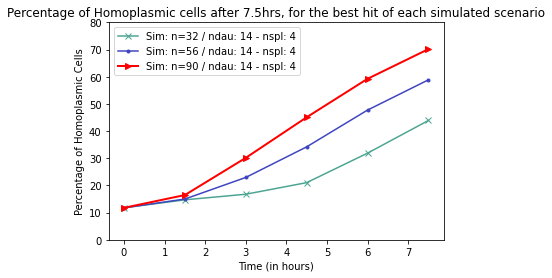

In [243]:
plt.figure(figsize=(6, 4))

ndau14_nspl4_df['perc_homo'].plot(label='Sim: n=32 / ndau: 14 - nspl: 4',  marker='x', color= '#4CA593')
ndau14_nspl4_56df['perc_homo'].plot(label='Sim: n=56 / ndau: 14 - nspl: 4', color = '#3e45bf', marker='.')
ndau14_nspl4_90df['perc_homo'].plot(label='Sim: n=90 / ndau: 14 - nspl: 4',  linewidth=2, color = 'red', marker = '>')
#perc_homo_data['perc_homoplasmic_cells'].plot(label='experimental_data', linewidth=3, color = 'black', marker= 'o')

plt.legend()
plt.ylabel('percentage_homoplasmic_cells')
plt.title('Percentage of Homoplasmic cells after 7.5hrs, for the best hit of each simulated scenario')
plt.xlabel('Time (in hours)')
plt.ylabel('Percentage of Homoplasmic Cells')
plt.ylim(0, 80)
plt.savefig('sigmoid_curves_sim_mix_32_56_90_same_ndau_nspl.svg', transparent=True)

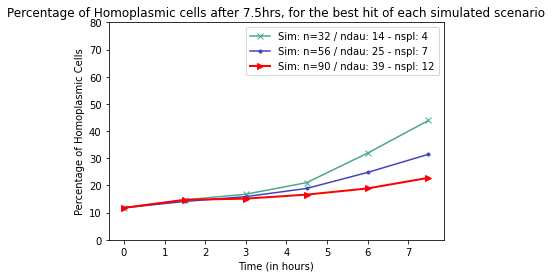

In [253]:
plt.figure(figsize=(6, 4))

ndau14_nspl4_df['perc_homo'].plot(label='Sim: n=32 / ndau: 14 - nspl: 4',  marker='x', color= '#4CA593')
ndau25_nspl7_56df['perc_homo'].plot(label='Sim: n=56 / ndau: 25 - nspl: 7', color = '#3e45bf', marker='.')
ndau39_nspl12_90df['perc_homo'].plot(label='Sim: n=90 / ndau: 39 - nspl: 12',  linewidth=2, color = 'red', marker = '>')
#perc_homo_data['perc_homoplasmic_cells'].plot(label='experimental_data', linewidth=3, color = 'black', marker= 'o')

plt.legend()
plt.ylabel('percentage_homoplasmic_cells')
plt.title('Percentage of Homoplasmic cells after 7.5hrs, for the best hit of each simulated scenario')
plt.xlabel('Time (in hours)')
plt.ylabel('Percentage of Homoplasmic Cells')
plt.ylim(0, 80)
plt.savefig('sigmoid_curves_sim_mix_32_56_90_increased_fission.svg', transparent=True)

In [169]:
perc_homo_data.set_index('time', inplace=True)
perc_homo_data

,perc_homoplasmic_cells
time,
0.0,13.796744
1.5,13.811090
3.0,13.974290
4.5,15.750380
6.0,28.698290
7.5,49.250570
